In [2]:
import glob, pandas as pd, numpy as np, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
os.system('pip uninstall -y transformers')
os.system('pip uninstall -y tokenizers')
os.system('python -m pip install --no-index --find-links=../input/fb3-my-pip-wheels transformers')
os.system('python -m pip install --no-index --find-links=../input/fb3-my-pip-wheels tokenizers')

Found existing installation: transformers 4.20.1
Uninstalling transformers-4.20.1:
  Successfully uninstalled transformers-4.20.1


Found existing installation: tokenizers 0.12.1
Uninstalling tokenizers-0.12.1:
  Successfully uninstalled tokenizers-0.12.1


Looking in links: ../input/fb3-my-pip-wheels
Processing /kaggle/input/fb3-my-pip-wheels/transformers-4.21.2-py3-none-any.whl
Processing /kaggle/input/fb3-my-pip-wheels/tokenizers-0.12.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 3.19.4 which is incompatible.
allennlp 2.10.0 requires transformers<4.21,>=4.1, but you have transformers 4.21.2 which is incompatible.


Looking in links: ../input/fb3-my-pip-wheels


0

In [4]:
!mkdir -p /tmp/pip/cache/
!cp ../input/hdbscan0828whl/hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl /tmp/pip/cache/
!ls /tmp/pip/cache/
!pip install --no-index --find-links /tmp/pip/cache/ hdbscan

hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl
Looking in links: /tmp/pip/cache/
Processing /tmp/pip/cache/hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl


In [5]:
sys.path.append('../input/sentence-transformers/sentence-transformers-master/')
sys.path.append('../input/bertopic/BERTopic/')
from bertopic import BERTopic

# BERTopic infer

In [6]:
sws = stopwords.words("english") + ["n't",  "'s", "'ve"]

In [7]:
import pandas as pd
docs = []
df = pd.read_csv('../input/feedback-prize-english-language-learning/train.csv')
for fl in tqdm(df['full_text']):
    word_tokens = word_tokenize(fl)
    txt = " ".join([w for w in word_tokens if not w.lower() in sws])
    docs.append(txt)

100%|██████████| 3911/3911 [00:13<00:00, 292.28it/s]


In [8]:
topic_model = BERTopic(n_gram_range=(1, 2), top_n_words=3, verbose=True)
topics, probs = topic_model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/123 [00:00<?, ?it/s]

2022-10-25 07:04:05,181 - BERTopic - Transformed documents to Embeddings
2022-10-25 07:04:26,782 - BERTopic - Reduced dimensionality
2022-10-25 07:04:26,921 - BERTopic - Clustered reduced embeddings


In [9]:
tm_meta = topic_model.get_topic_info()
display(tm_meta)

df['topic'] = topics
df['prob'] = probs
df['topic_name'] = df['topic'].map(pd.Series(tm_meta['Name'].values, tm_meta['Topic']))
df['topic_count'] = df['topic'].map(pd.Series(tm_meta['Count'].values, tm_meta['Topic']))
df['avg_score'] = df[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']].sum(axis=1) / 6

,Topic,Count,Name
0,-1,351,-1_life_people_want
1,0,298,0_online_classes_home
2,1,222,1_school_hours_day
3,2,208,2_attitude_positive_positive attitude
4,3,176,3_technology_people_use
5,4,171,4_accomplish_something_always
6,5,158,5_impression_first_impressions
7,6,154,6_career_young_age
8,7,146,7_years_high school_high
9,8,140,8_group_working_work


# visualize scores with topic

In [10]:
target_cols = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
df_ = df.set_index('topic_name')[target_cols].stack() .reset_index()
df_.columns = ['topic', 'score', 'value']

In [26]:
df.drop(columns=['avg_score']).to_csv('train_topics.csv', index=False)

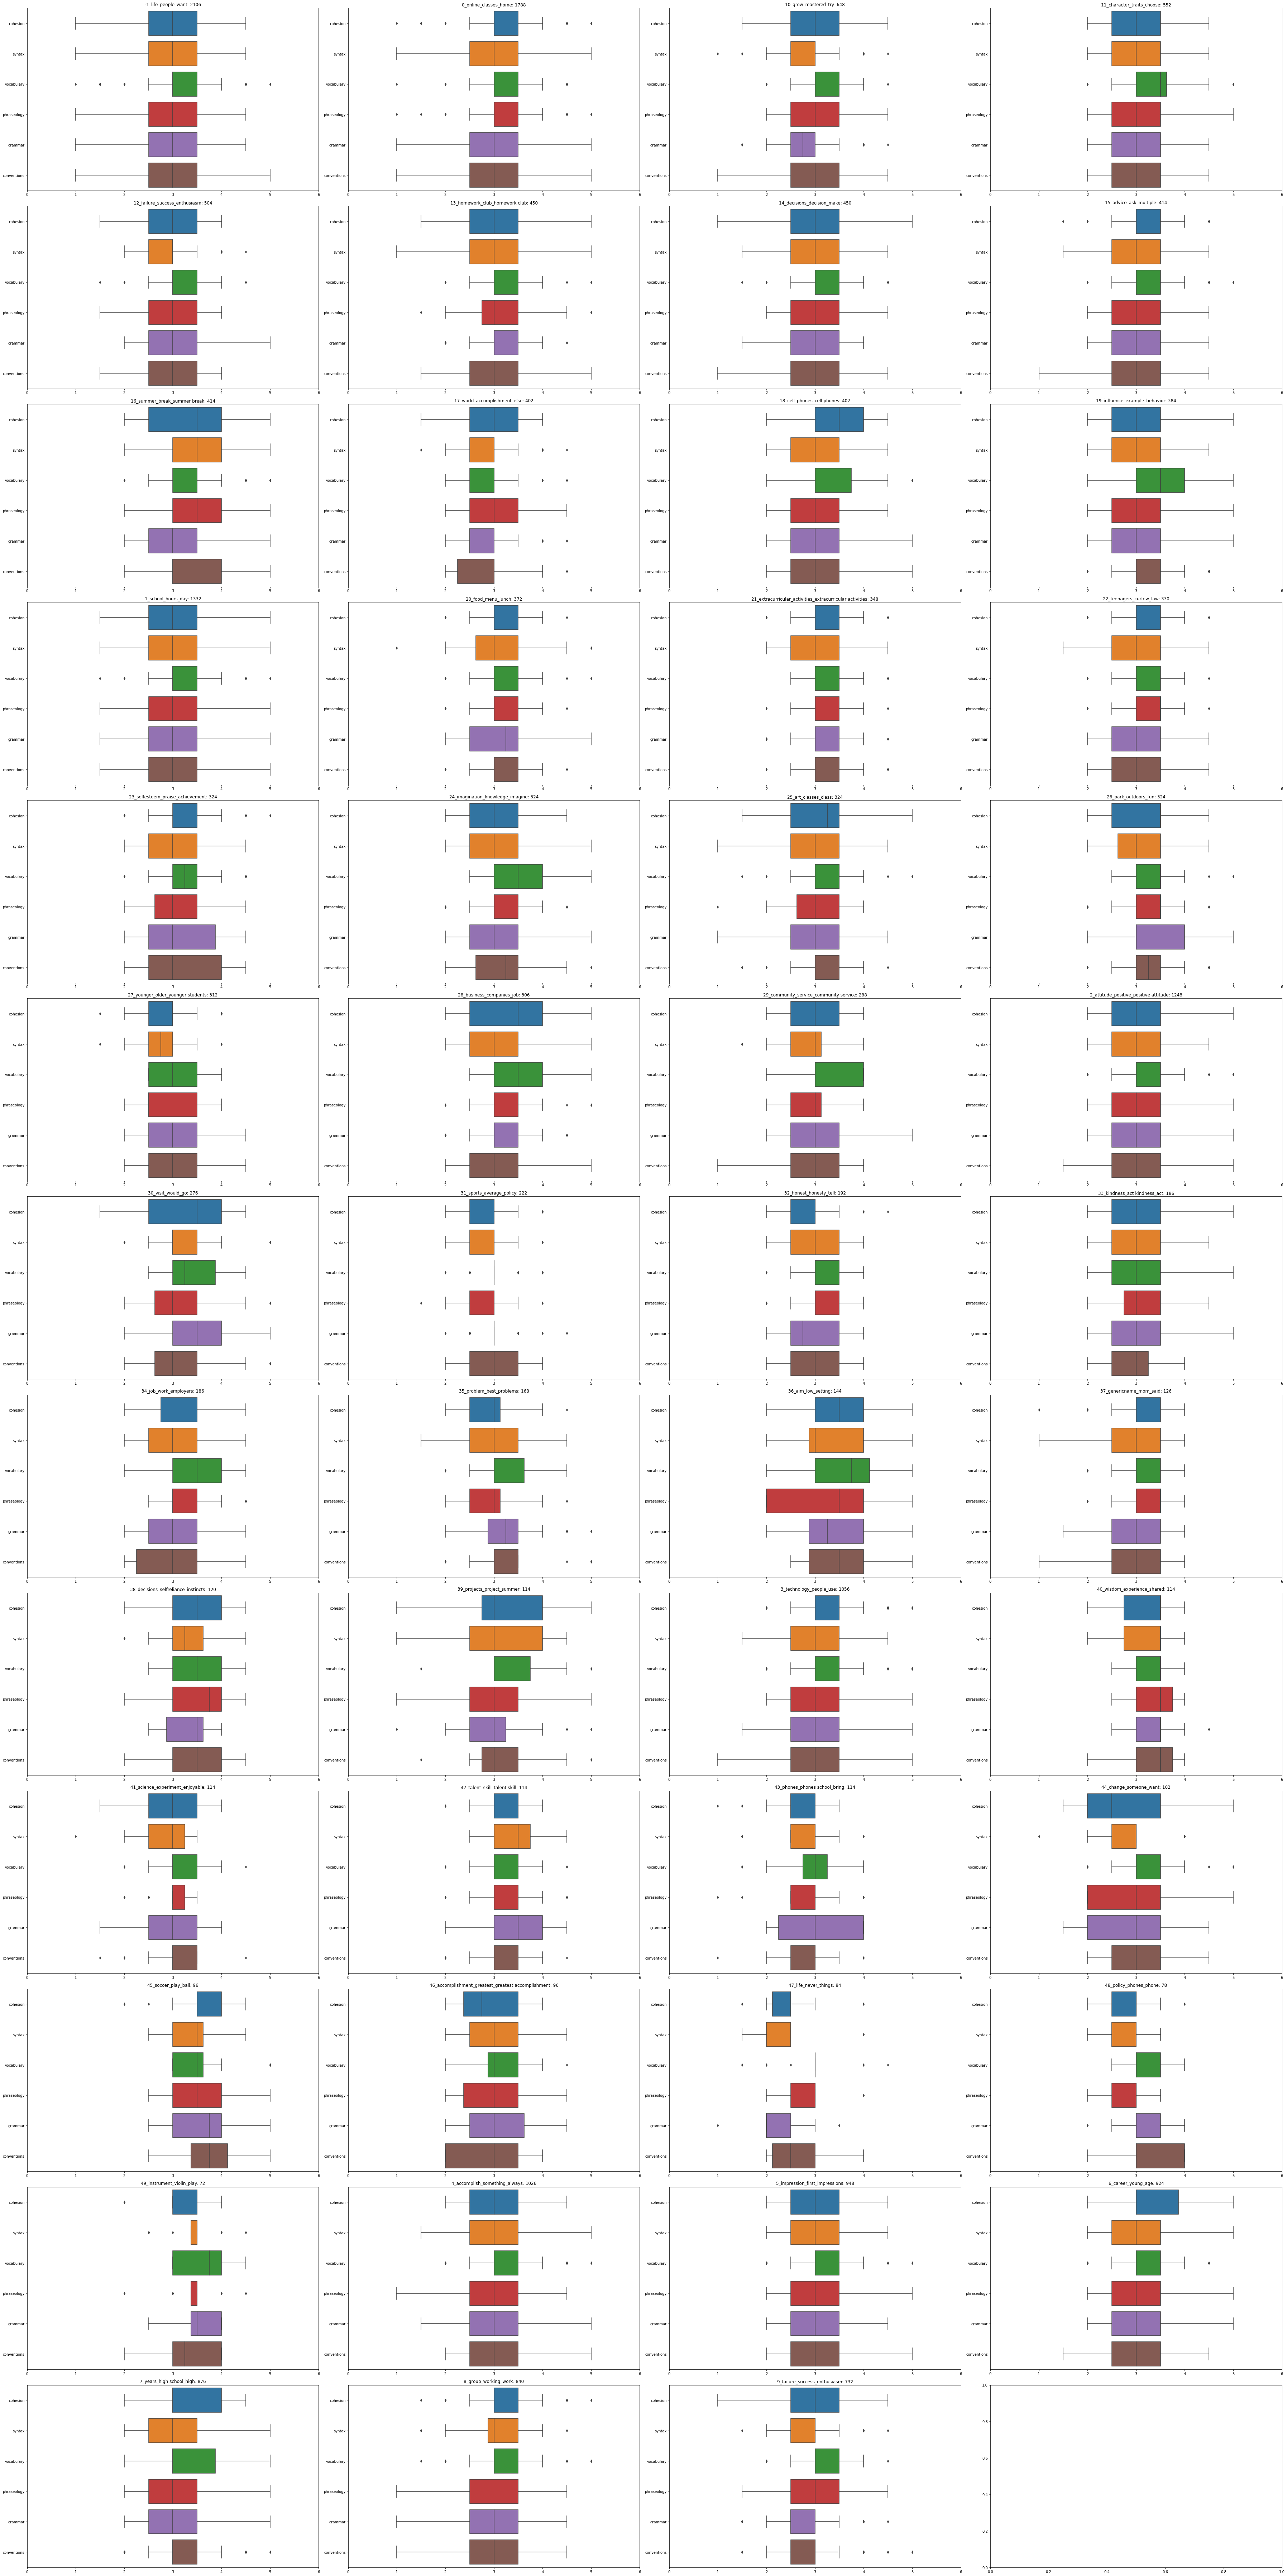

In [14]:
n_topic = df_['topic'].nunique()
n_cols = 4
f, ax = plt.subplots(13, n_cols, figsize=(50, 100))
ax = ax.ravel()
for i, topic in enumerate(sorted(df_['topic'].unique())):
    df_topic = df_[df_['topic'] == topic]
    sns.boxplot(data=df_topic, y='score', x='value', ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(f'{topic}: {len(df_topic)}')
    ax[i].set_xlim(0, 6)
plt.tight_layout()

In [15]:
f.savefig('index.jpg')

In [20]:
df_stats = df_.groupby('topic')['value'].agg(['min', 'mean', 'median', 'max']).reset_index()

In [21]:
df_stats

,topic,min,mean,median,max
0,-1_life_people_want,1.0,2.977920,3.0,5.0
1,0_online_classes_home,1.0,3.127796,3.0,5.0
2,10_grow_mastered_try,1.0,2.942901,3.0,4.5
3,11_character_traits_choose,2.0,3.151268,3.0,5.0
4,12_failure_success_enthusiasm,1.5,2.964286,3.0,5.0
5,13_homework_club_homework club,1.0,3.121111,3.0,5.0
6,14_decisions_decision_make,1.0,3.066667,3.0,5.0
7,15_advice_ask_multiple,1.0,3.080918,3.0,5.0
8,16_summer_break_summer break,2.0,3.298309,3.5,5.0
9,17_world_accomplishment_else,1.5,2.859453,3.0,4.5


In [22]:
df_min_max.to_csv('topic_stats.csv', index=False)

In [23]:
topic_model.save('bertopic_train.model')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
